# Manipulación de Imagenes

## 1. Librerias

In [1]:
!pip install matplotlib
!pip install mahotas
!pip install cv
!pip install scikit-image
!pip install opencv-python

In [2]:
import numpy as np
import cv2 as cv2
import io as io
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpi
from PIL import Image 
import mahotas
import mahotas.demos

## 5. Procesamiento de imágenes

In [3]:
# Convertir imagen en arreglo numpy
ruta="./imagenes/_lena.png"
gris = cv2.imread(ruta,0)

print("Imagen original:", np.shape(original))
print("Imagen en escala de grises",np.shape(gris))

Imagen original: (512, 512, 3)
Imagen en escala de grises (512, 512)


Recordando lo aprendido en computación grafica, los conceptos se conservan de manera general. 
* Traslación
* Rotación
* Escalamiento

Imagen A:  (321, 481, 3)


(-0.5, 480.5, 320.5, -0.5)

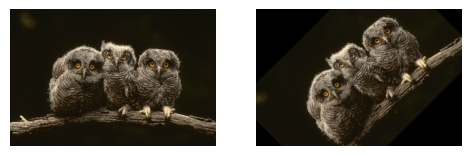

In [10]:
# Rotación
ruta="./imagenes/42044.jpg"
im = cv2.imread(ruta)
print("Imagen A: ", np.shape(im))

height, width = im.shape[:2]
center = (width/2, height/2)
angle =45
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(im, rotation_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(rotated_image,cv2.COLOR_BGR2RGB))
plt.axis("off")

### 5.5. Filtros

Existen diversos tipos de ruido como: sal y pimienta, gaussiano, speckle.

(-0.5, 511.5, 511.5, -0.5)

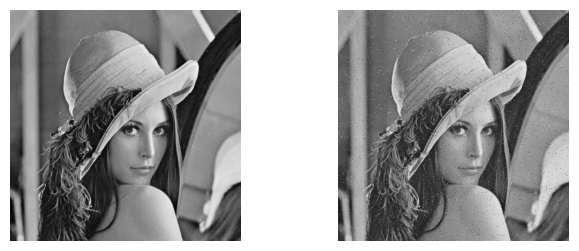

In [52]:
#### Ruido
from skimage.util import random_noise

noisy_image = random_noise(gris, mode='s&p',amount=0.01)
noisy_image=np.uint8(noisy_image*255)

plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.imshow(gris,cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_image,cmap=plt.cm.gray)
plt.axis("off")

#### 5.5.1. Filtros dominio espacial

(-0.5, 511.5, 511.5, -0.5)

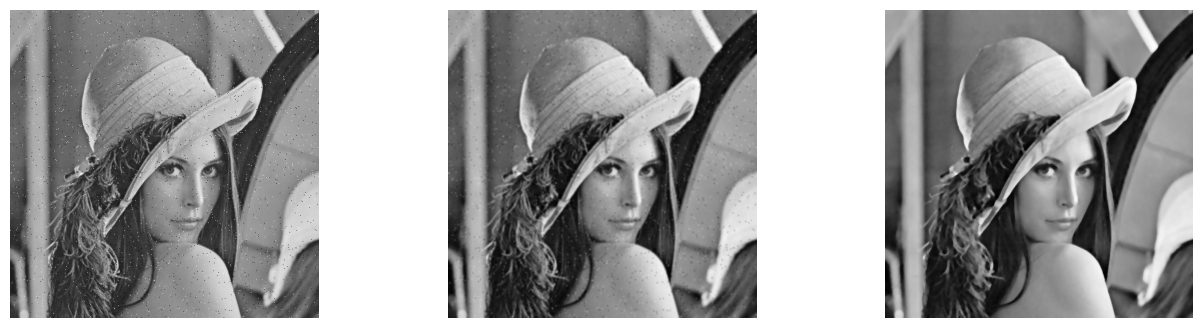

In [54]:
denoised_image1 = cv2.GaussianBlur(noisy_image, (5, 5), 0)
denoised_image2 = cv2.medianBlur(noisy_image,ksize=5)

plt.figure(figsize=(16,4))

#completar

#### 6.2.2. filtros dominio de la frecuencia

(-0.5, 511.5, 511.5, -0.5)

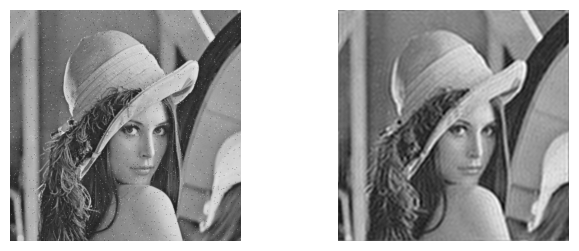

In [61]:
# Calcular la transformada de Fourier 2D
f_transform = np.fft.fft2(noisy_image)
f_shift = np.fft.fftshift(f_transform)

# Crear un kernel para filtro paso-bajo (suavizado)
f, c = noisy_image.shape
center_f, center_c = f // 2, c // 2
radius = 50  # Ajusta el tamaño del filtro
mask = np.zeros((f, c), dtype=np.uint8)
mask[center_f - radius:center_f + radius, center_c - radius:center_c + radius] = 1

# Aplicar el filtro en el dominio de la frecuencia
f_filtered = f_shift * mask

# Calcular la transformada inversa
denoised_image = np.abs(np.fft.ifft2(np.fft.ifftshift(f_filtered)))

# Mostrar la imagen filtrada

### 5.6. Detectores de bordes

(-0.5, 511.5, 511.5, -0.5)

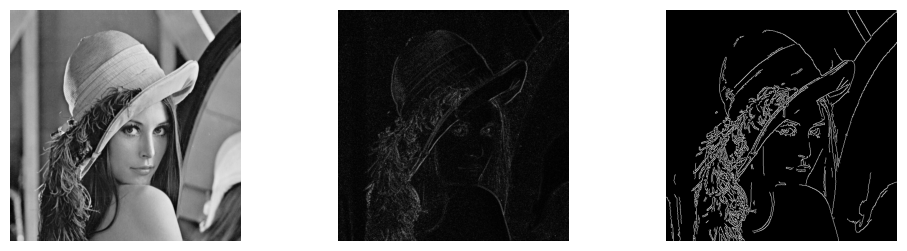

In [68]:
#Completar los demas detectores de bordes no olvidar tomar en cuenta la información brindada de clase teorica 
# Para los detectores de primer orden apoyarse de filter2D
laplacian=np.uint8(np.abs((cv2.Laplacian(gris, cv2.CV_64F))))
canny= np.uint8(cv2.Canny(gris, 100, 200))

# Mostrar bordes
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.imshow(gris,cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(laplacian, cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(canny, cmap=plt.cm.gray)
plt.axis("off")